In [112]:
%store -r grouped

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [114]:
grouped = grouped.round(4)
# grouped = grouped.sort_values(by = 'Website Registrations Completed', ascending=False)
grouped.head()

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD),target
0,1,26469,6.9224,319.02,29730,68.0954,86.0,18.0558,1.4894,79.4968,0.0,10.0,146.0,60.0,991.0,0.0000,71.4410,NaN
1,2,16972,7.3817,477.69,20831,134.4143,156.0,12.5326,3.0193,164.7964,6.0,21.0,27.0,5.0,89.0,378.4300,115.3077,63.0717
2,3,2775,6.0273,90.59,2795,183.9762,16.0,35.2247,2.0534,184.8206,0.0,2.0,6.0,2.0,2.0,0.0000,14.1550,NaN
3,4,43112,7.8309,1312.77,55490,185.8558,448.0,20.4192,4.3183,176.8253,24.0,77.0,58.0,10.0,156.0,253.4492,76.8183,10.5604
4,5,26836,7.8653,670.06,30412,146.0897,153.0,25.6717,2.2889,165.1023,16.0,43.0,72.0,28.0,553.0,151.8192,77.2328,9.4887


In [115]:
grouped['Cost per Website Registration Completed (USD)'].loc[grouped['Cost per Website Registration Completed (USD)'] <50].count()

# 8/36

8

In [129]:
grouped = grouped.dropna()

In [175]:
grouped.target.count()

30

In [167]:
grouped['Cost per Website Registration Completed (USD)'].describe()

count     30.000000
mean     214.649273
std      109.882290
min       27.300000
25%      150.799800
50%      197.108300
75%      289.838025
max      436.093300
Name: Cost per Website Registration Completed (USD), dtype: float64

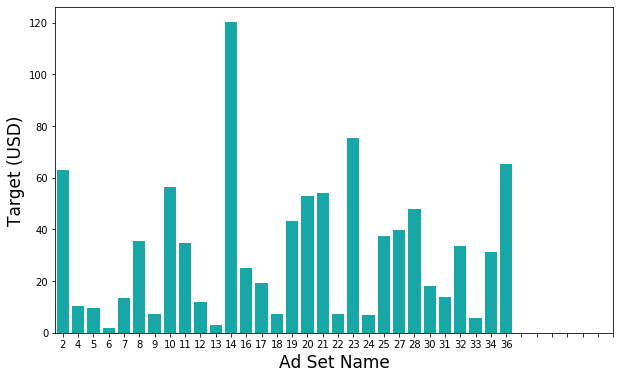

In [170]:
grouped.target

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(grouped['Ad Set Name'], grouped['target'].sort_values(ascending=False), color='c')


plt.xlabel('Ad Set Name', fontsize=17)
plt.ylabel('Target (USD)', fontsize=17)
plt.xticks(np.arange(0,37,1))

# plt.legend()

plt.show()

No handles with labels found to put in legend.


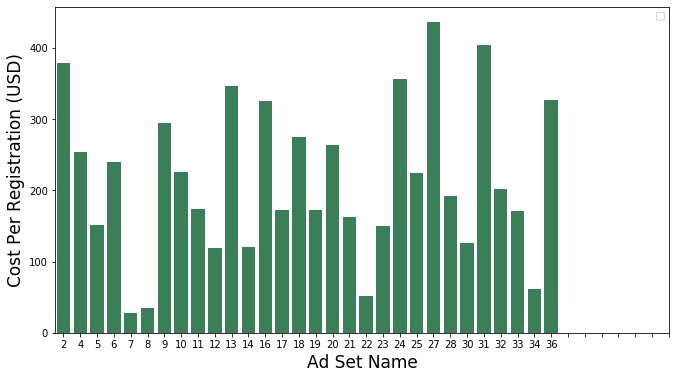

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11,6))
sns.barplot(grouped['Ad Set Name'], grouped['Cost per Website Registration Completed (USD)'].sort_values(ascending=False), color='seagreen')

plt.xlabel('Ad Set Name', fontsize=17)
plt.ylabel('Cost Per Registration (USD)', fontsize=17)
plt.xticks(np.arange(0,37,1))

plt.legend()

plt.show()

In [131]:
# plt.figure(figsize=(9,5))
# sns.barplot( grouped['Ad Set Name'], grouped['Website Registrations Completed'], color='c')
# plt.title('Registrations by Sets of Ads', fontsize=16)

import plotly.express as px

fig = px.bar(grouped, x='Ad Set Name', y='Website Registrations Completed', height=450,
             width=750,  color_discrete_map={'Website Registrations Completed': 'green'})
fig.update_xaxes(nticks=36)
fig.update_layout(
    title="Sets of Ads and Complete Registrations",
    xaxis_title="Ad Set Name",
    yaxis_title="Website Registrations Completed",
    font=dict(
        family="Courier New, ",
        size=15,
        color="darkslategrey"))
fig.show()

In [132]:

import numpy as np
import plotly.express as px

fig = px.scatter(grouped,  y='Impressions', x='Website Registrations Completed',
               color='Amount Spent (USD)',
             height=500, width=800, color_continuous_scale=px.colors.sequential.Cividis_r,
            )
# fig.update_xaxes(nticks=36)

fig.update_layout(
    
    xaxis_title="Completed Registration",
    yaxis_title="Impressions",
    font=dict(
        family="Courier New, ",
        size=19,
        color="black"))

fig.show()

In [133]:
fig = px.line(grouped, x= 'Website Registrations Completed', y= 'CPC (Cost per Link Click) (USD)',
              height=500, width=800)
fig.show()

In [135]:
import numpy as np
import plotly.express as px

fig = px.bar(grouped,  y='Reach', x='Ad Set Name',
             hover_data=['Impressions', 'Frequency'], color='Website Registrations Completed',
             height=400, width=900, color_continuous_scale=px.colors.sequential.Cividis_r,
            )
fig.update_xaxes(nticks=36)
fig.update_layout(uniformtext_minsize=12, title_text='Users Reached and Registrations')

fig.show()

# Linear Regression

In [136]:
from sklearn.model_selection import train_test_split

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(grouped)

scaled = pd.DataFrame(scaled, columns=grouped.columns)

scaled = scaled.round(4)
scaled.head(2)

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD),target
0,0.0000,0.0999,0.1521,0.0861,0.0899,0.0976,0.0673,0.1062,0.2466,0.1569,0.0413,0.0430,0.1053,0.0781,0.1533,0.8589,0.4029,0.5167
1,0.0588,0.2790,0.2021,0.2722,0.2588,0.2212,0.2027,0.3136,0.3947,0.1862,0.1901,0.1766,0.2308,0.1562,0.2755,0.5532,0.2432,0.0727


In [ ]:
sc

In [143]:
X= scaled.drop(['Website Registrations Completed', 'Ad Set Name',
], axis=1)
y = scaled['Website Registrations Completed']

y.head()

0    0.0413
1    0.1901
2    0.1240
3    1.0000
4    0.0083
Name: Website Registrations Completed, dtype: float64

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

In [145]:
lm = LinearRegression()


model = lm.fit(X_train, y_train)

model.score(X_test, y_test)

# model.score(X_train, y_train)

0.8825364814784527

# New heading

In [146]:
import pandas as pd
df = pd.DataFrame(model.coef_)
df['featues'] = X.columns

df.columns = ['Coef', 'features']

df = df.sort_values('Coef', ascending=False)

df

,Coef,features
3,2.524049,Impressions
2,1.259939,Amount Spent (USD)
5,0.239861,Link Clicks
9,0.191335,Website Leads
12,0.151690,Post Reactions
4,0.116288,"CPM (Cost per 1,000 Impressions) (USD)"
14,0.081674,Cost per Website Lead (USD)
11,0.081473,Post Comments
1,0.078131,Frequency
13,0.019605,Cost per Website Registration Completed (USD)


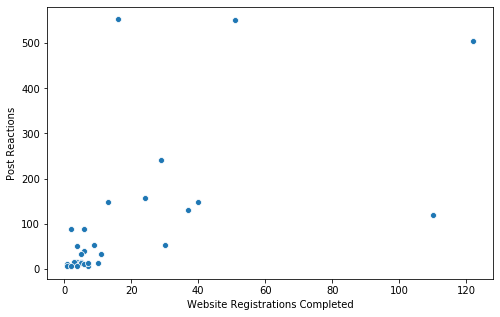

In [147]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=grouped , x='Website Registrations Completed',
                y= 'Post Reactions',  palette="ch:r=-.5,l=.75")

# plt.title('Top Indicators of Customer Acquisition', fontsize=15)
# plt.xlabel('Website Registrations Completed', fontsize=14)
# plt.ylabel('Impressions', fontsize=14)

plt.show()

# A negative coefficient suggests that as the independent variable increases,
# the dependent variable tends to decrease.


<Figure size 432x216 with 0 Axes>

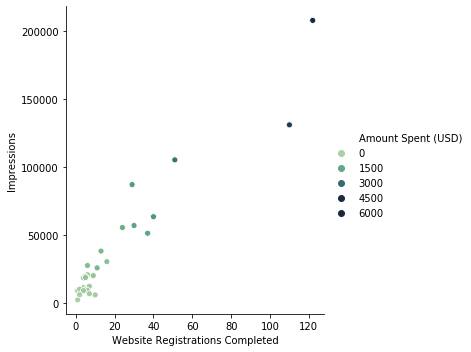

In [148]:
plt.figure(figsize=(6,3))
sns.relplot(data=grouped , x='Website Registrations Completed', y= 'Impressions',  
                hue='Amount Spent (USD)', palette="ch:r=-.5,l=.75")

# plt.title('Top Indicators of Customer Acquisition', fontsize=15)
# plt.xlabel('Website Registrations Completed', fontsize=14)
# plt.ylabel('Impressions', fontsize=14)

plt.show()

# sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

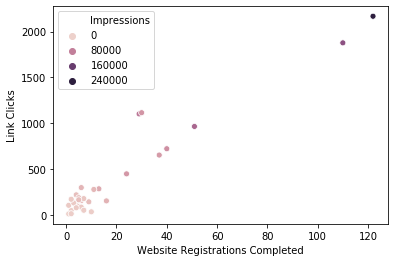

In [127]:
sns.scatterplot(grouped['Website Registrations Completed'],
                grouped['Link Clicks'], hue=grouped['Impressions'])

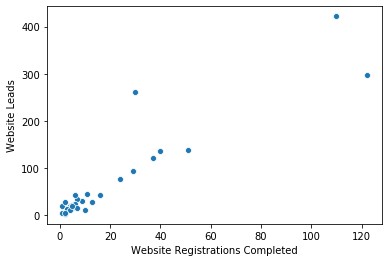

In [128]:
sns.scatterplot(grouped['Website Registrations Completed'],
                grouped['Website Leads'])